In [4]:
import h3
from shapely.geometry import Polygon
from tobler.util import h3fy
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import ee

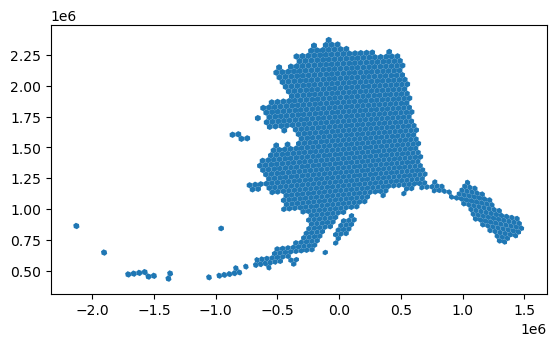

In [7]:
# Boroughs shape file in EPSG:3338 crs 
geodf_boroughs = gpd.read_file('~/Desktop/dssg-vis/Boroughs2020/Boroughs2020.shp')
#geodf_boroughs = geodf_boroughs.to_crs(epsg=4326) # convert crs
# Alaska shape file in EPSG:4269 crs 
geodf_alaska = gpd.read_file('~/Downloads/tl_2019_02_anrc/tl_2019_02_anrc.shp')
geodf_alaska = geodf_alaska.to_crs(epsg=3338) # convert crs

# Generate a hexgrid geodataframe with resolution 4
hexgrid_ak = h3fy(geodf_alaska.buffer(0.01), resolution=4)
hexgrid_ak.plot();

# The grid is created at resolution 4, but we can go to higher resolutions (H3 supports 16 resolutions) 
# — each finer resolution has cells with one-seventh of the area of the coarser resolution.

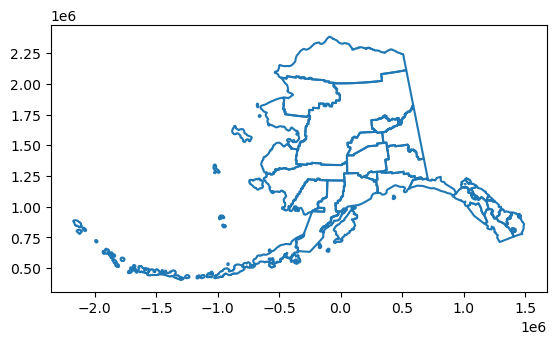

In [8]:
# Plot borough boundaries with lower borough removed for plotting purposes
geodf_boroughs.boundary.plot();

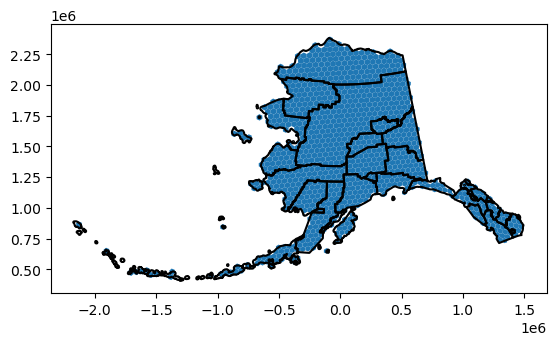

In [9]:
# Overlay hexagons and boroughs with no crop
fig, ax = plt.subplots()

hexgrid_ak.plot(ax=ax)
geodf_boroughs.boundary.plot(ax=ax, edgecolor = "black")
plt.show()

In [12]:
# Download hexagons as geojson
hexgrid_ak.to_file("../Data/hexgrid_ak.geojson", driver="GeoJSON")

In [ ]:
# Generate a hexgrid geodataframe with resolution 5
hexgrid_ak_res5 = h3fy(geodf_alaska.buffer(0.01), resolution=5)
hexgrid_ak_res5.to_file("../Data/hexgrid_ak_res5.geojson", driver="GeoJSON")